In [266]:
#Saipolla Saken
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import dash
from dash import dcc, Dash, Input, Output
from dash import html

#setting global figure size
plt.rcParams["figure.figsize"] = (10,8)

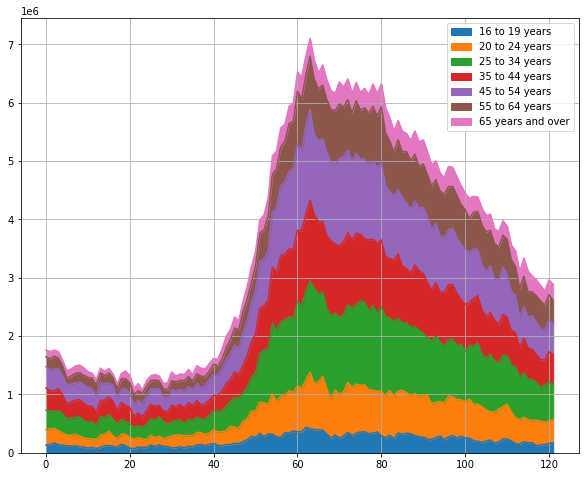

In [281]:
def problem1(data):
    #faster plot with pands, because it supports matplotlib
    data.plot.area(stacked=True)# function area() fills out stacked areas and parameter stacked = True visually separates areas
    plt.grid()
data = pd.read_csv("datafiles/monthly_unemployment_by_ages.csv")    
problem1(data)

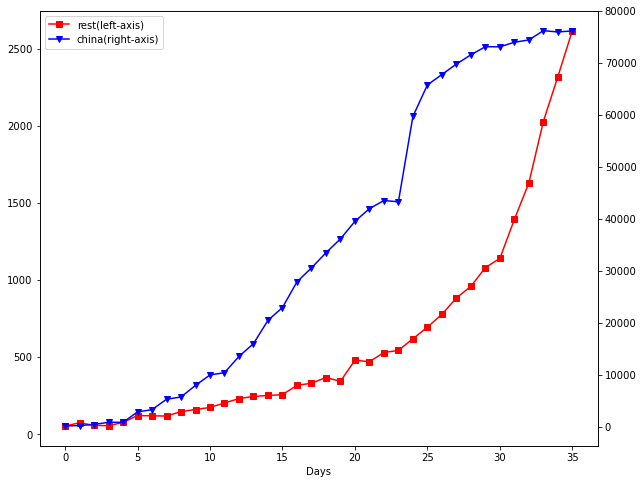

In [270]:
def problem2(data):
    fig = plt.figure()
    
    #creating subplots
    ax_rest = fig.add_subplot()
    
    """
    setting x label and plotting line for "rest" column, "s" marker sets square shaped marker
    adding label, in future we will add it as legend
    """
    ax_rest.set_xlabel("Days")
    rest_line = ax_rest.plot(data.rest, color = "r", marker = "s", label = "rest(left-axis)")
    
    #creating copy of first axes, which shares same x axis, also same procedure with markers and labels
    ax_china = ax_rest.twinx()
    china_line = ax_china.plot(data.china, color = "blue", marker = "v", label = "china(right-axis)")

    #combining both lines, so we can combine their labels into one legend box
    lines = rest_line + china_line
    labels = [line.get_label() for line in lines]
    ax_rest.legend(lines, labels, loc = 0)
    
    # saving the output as png file
    plt.savefig("covid.png")
    
data = pd.read_csv("datafiles/corona_china_vs_rest.csv")
problem2(data)

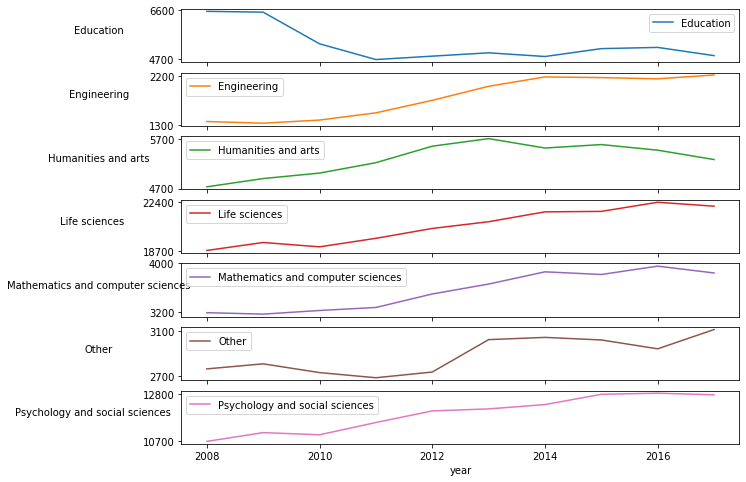

In [282]:
def problem3(data):
    #operation on dataframe, so we can get sum of all data for plotting, which grouped by year and broad_field
    #unstuck() function reshapes row index to the column axis
    grouped_data = data.groupby(['year', 'broad_field'])['n_phds'].sum().unstack()
    #getting column names from dataframe, in future they will be used as y labels for each subplot
    data_labels = list(data_grouped.columns.values.tolist())
    #plotting graphs
    axes = grouped_data.plot(subplots = True)

    for i in range(len(data_labels)):
        #setting y labels
        axes[i].set_ylabel(data_labels[i], rotation=0, labelpad=50)
        """
        rounding all data from dataframe to nearest 100, after that getting maximum and minimum values,
        they will be used for y ticks
        """
        min_label, max_label = (data_grouped[data_labels[i]].round(-2).min()), (data_grouped[data_labels[i]].round(-2).max())
        axes[i].set_yticks((min_label, max_label))
        
data = pd.read_csv("datafiles/phd_by_field.csv")
problem3(data)

IMPORTANT!!! SETTING Y-TICKS TO NEAREST HUNDRED GIVES DIFFERENT OUTPUT IN COMPARISON WITH IMAGE IN PDF FILE. IT CAN BE CHECKED BY CALLING grouped_data DATAFRAME


In [ ]:
def problem4(df):
    app = Dash(__name__)
    app.layout = html.Div([
    dcc.Dropdown(df.columns, df.columns[-1], id="date"),
    dcc.Dropdown(df.index, df.index[-1], id = "country"),
    html.Div(id='graph1', style={"display": "inline-block"}),
    html.Div(id='graph1', style={"display": "inline-block"})
    ])


    @app.callback(
        Output('graph1', 'children'),
        Input('date', 'value')
    )
    def update_output(value):
        return f'You have selected {value}'

data = pd.read_csv("datafiles/covid19_ecdc_28_07_20.csv")
data.dateRep = pd.to_datetime(dateRep, format = "%d/%m/%Y")
confirmed_by_country = data.pivot(index = "countriesAndTerritories", columns = "dataRep", values = "cases")
confirmed_7day_mean = confirmed_by_country.rolling(7, axis=1, min_periods = 1).mean()

problem4(confirmed_7day_mean)